In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
124,125,Female,23,70,29
17,18,Male,20,21,66
171,172,Male,28,87,75
83,84,Female,46,54,44
1,2,Male,21,15,81


In [3]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [4]:
data.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


In [5]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

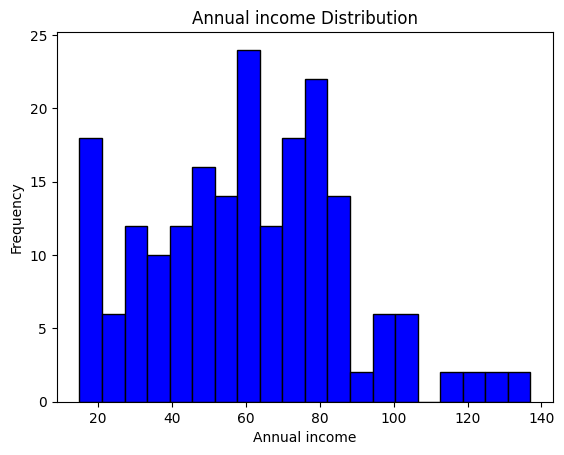

In [6]:
# data Analysis
plt.hist(data['Annual Income (k$)'], bins=20, color='blue', edgecolor='black')
plt.title('Annual income Distribution')   
plt.xlabel('Annual income')
plt.ylabel('Frequency') 
plt.title('Annual income Distribution')
plt.show()

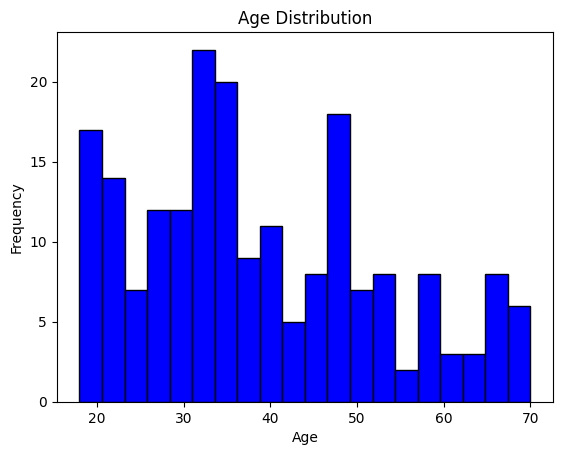

In [7]:
# data Analysis
plt.hist(data['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Age Distribution')   
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.title('Age Distribution')
plt.show()

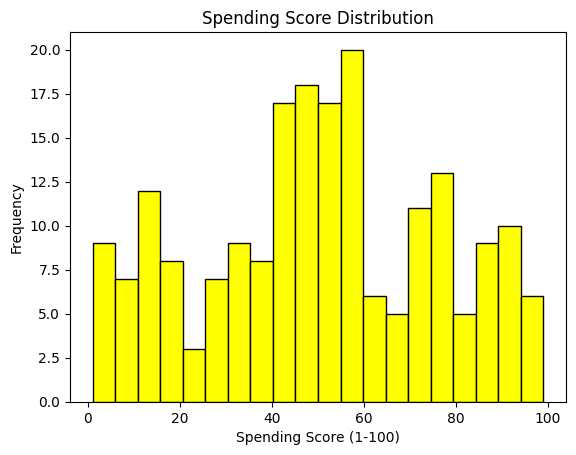

In [8]:
# data Analysis
plt.hist(data['Spending Score (1-100)'], bins=20, color='yellow', edgecolor='black')
plt.title('Spending Score Distribution')   
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency') 
plt.show()

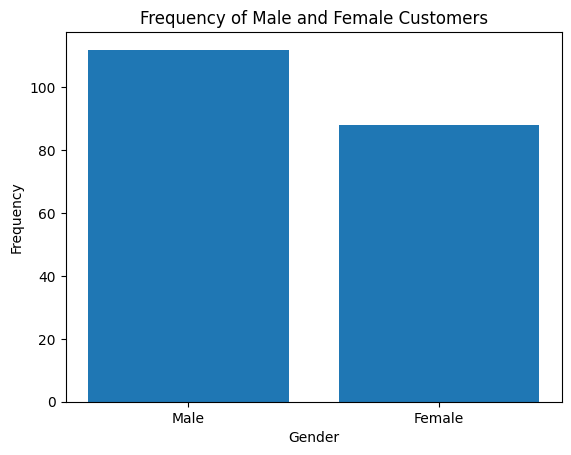

In [9]:
gender_counts = data['Gender'].value_counts()
gender_labels = ['Male', 'Female']

plt.bar(gender_labels, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Male and Female Customers')
plt.show()

In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
df=data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
x=df[['Annual Income (k$)', 'Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


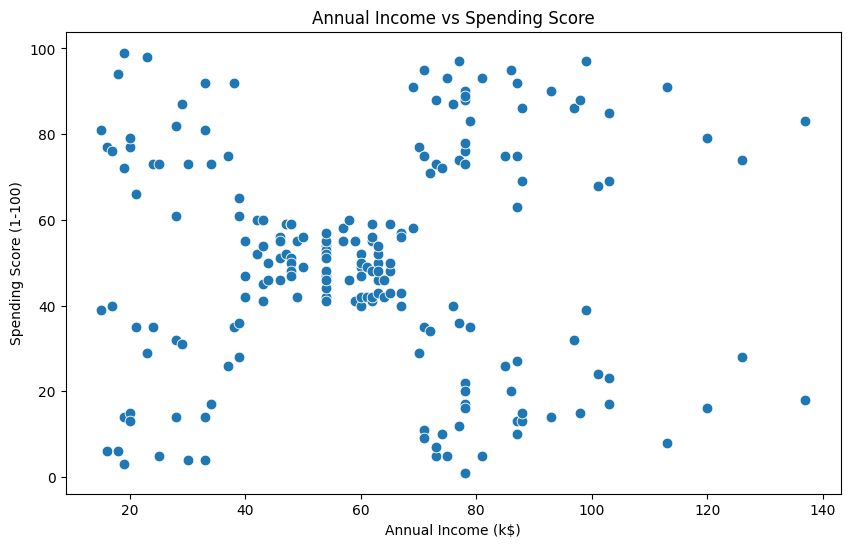

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=x,s=60)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')        
plt.ylabel('Spending Score (1-100)')
plt.show()

C:\Users\Soumaya\AppData\Local\Temp\ipykernel_8664\3167801726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] = kmeans.labels_


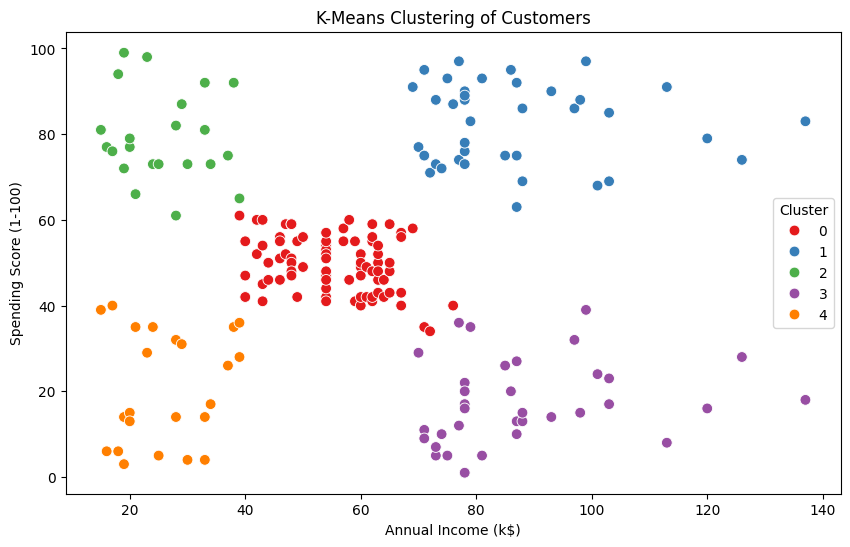

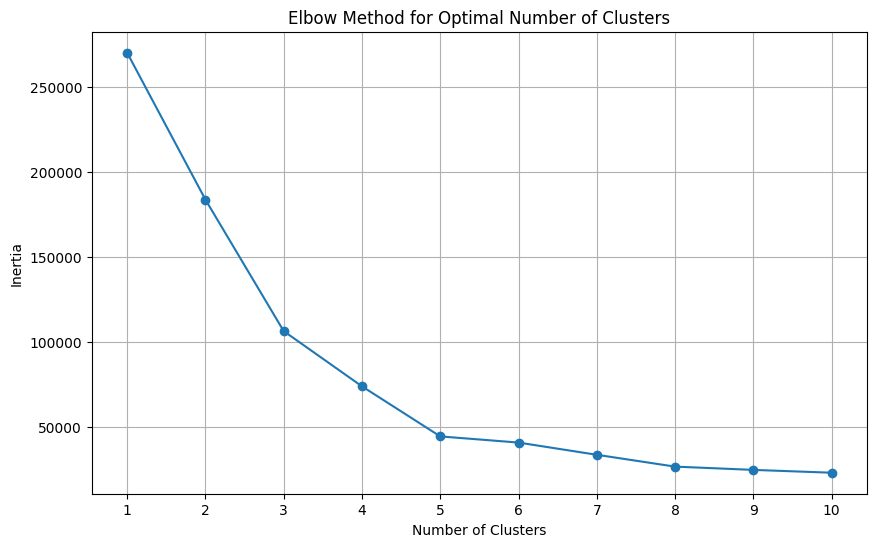

Silhouette Score: 0.55
New Data Clusters: [0 5]
   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)  
x['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=x, palette='Set1', s=60)
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
# Elbow Method to find optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()
# Silhouette Score to evaluate clustering
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x[['Annual Income (k$)', 'Spending Score (1-100)']], x['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')
# Save the clustered data to a new CSV file
x.to_csv('clustered_customers.csv', index=False)
# Save the KMeans model
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')


# Load the KMeans model
kmeans_loaded = joblib.load('kmeans_model.pkl')
# Predict clusters for new data
new_data = pd.DataFrame({'Annual Income (k$)': [60, 80],
                        'Spending Score (1-100)': [50, 70]})
new_clusters = kmeans_loaded.predict(new_data)
print(f'New Data Clusters: {new_clusters}')
# Load the clustered data
clustered_data = pd.read_csv('clustered_customers.csv')
# Display the first few rows of the clustered data
print(clustered_data.head())
# Load the original data
original_data = pd.read_csv('Mall_Customers.csv')

In [18]:
km1=KMeans(n_clusters=5)
km1.fit(x)
y=km1.predict(x)
df["label"]=y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,0,19,15,39,3
1,2,0,21,15,81,1
2,3,1,20,16,6,3
3,4,1,23,16,77,1
4,5,1,31,17,40,3


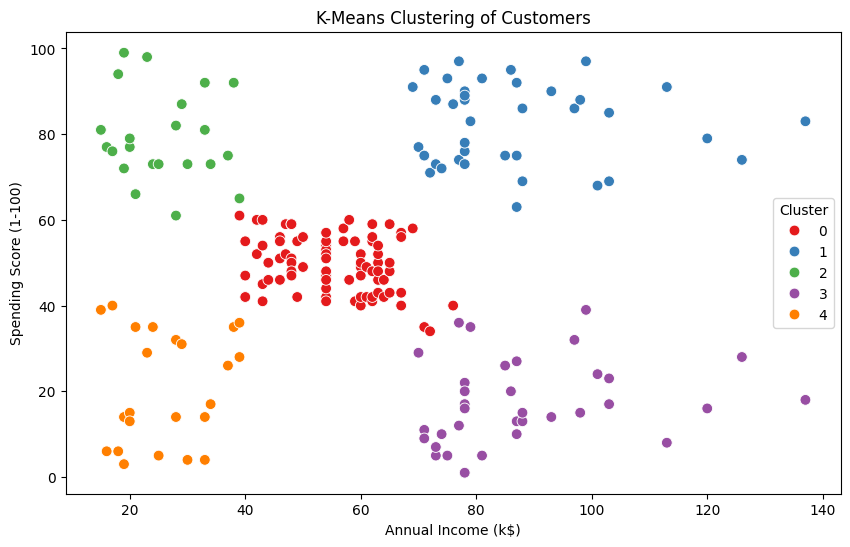

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=x, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=60)
plt.title('K-Means Clustering of Customers')    
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [22]:
cust1=df[df['label']==1]
print("Number of customers in cluster 1:", len(cust1))
print('They are -', cust1['CustomerID'].values)
print("--------------------------------------------")
cust2=df[df['label']==2]
print("Number of customers in cluster 2:", len(cust2))      
print('They are -', cust2['CustomerID'].values)
print("--------------------------------------------")
cust3=df[df['label']==3]
print("Number of customers in cluster 3:", len(cust3))              
print('They are -', cust3['CustomerID'].values)
print("--------------------------------------------")
cust4=df[df['label']==4]
print("Number of customers in cluster 4:", len(cust4))
print('They are -', cust4['CustomerID'].values)
print("--------------------------------------------")


Number of customers in cluster 1: 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customers in cluster 2: 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customers in cluster 3: 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------
Number of customers in cluster 4: 80
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 143]
--------------------------------------------


In [23]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [24]:
df2=data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [26]:
x1=df2[['Annual Income (k$)', 'Spending Score (1-100)']]

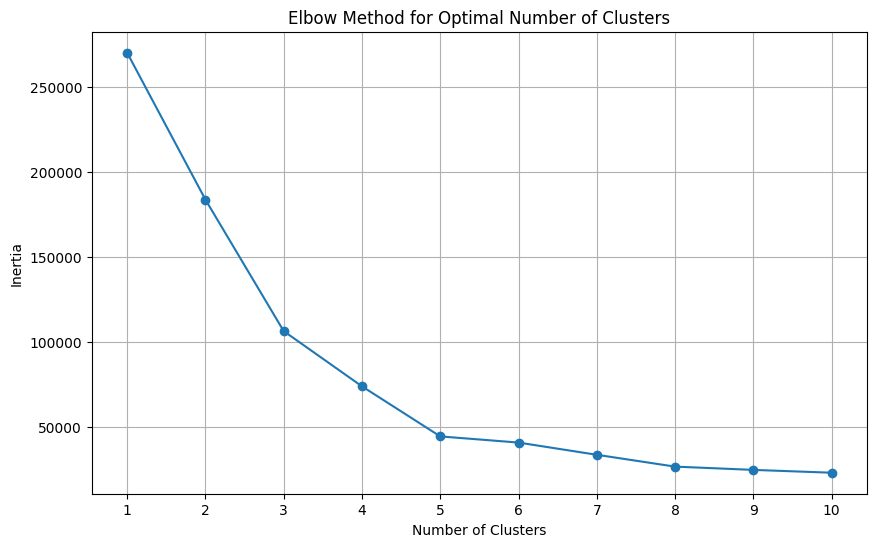

In [28]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,init='k-means++')
    kmeans.fit(x1)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [29]:
km2=KMeans(n_clusters=5)
km2.fit(x1)
y1=km2.predict(x1)
df2["label"]=y1
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,0,19,15,39,3
1,2,0,21,15,81,1
2,3,1,20,16,6,3
3,4,1,23,16,77,1
4,5,1,31,17,40,3


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (28,) and arg 2 with shape (36,).

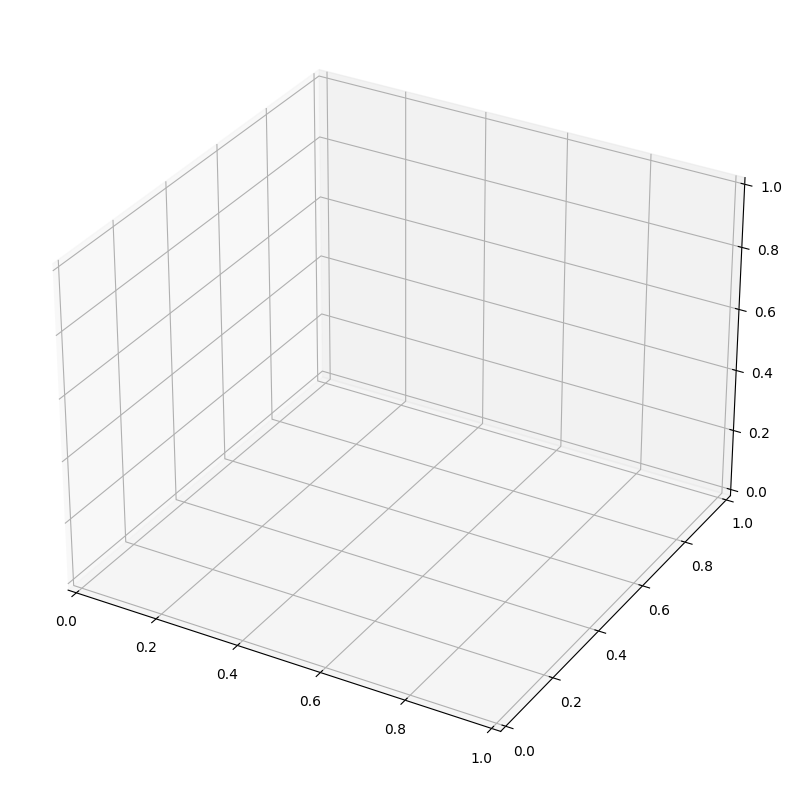

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2["Age"][df2.label == 0],df2['Annual Income (k$)'][df2.label == 0],df2['Spending Score (1-100)'][df.label ==0],c="purple", cmap='viridis', s=60)
ax.scatter(df2["Age"][df2.label == 1],df2['Annual Income (k$)'][df2.label == 1],df2['Spending Score (1-100)'][df.label ==0],c="red" ,cmap='viridis', s=60)
ax.scatter(df2.Age[df2.label == 2],df2['Annual Income (k$)'][df2.label == 2],df2['Spending Score (1-100)'][df.label ==0],c="yellow", cmap='viridis', s=60)
ax.scatter(df2.Age[df2.label == 3],df2['Annual Income (k$)'][df2.label == 3],df2['Spending Score (1-100)'][df.label ==0],c="green" ,cmap='viridis', s=60)
ax.scatter(df2.Age[df2.label == 4],df2['Annual Income (k$)'][df2.label == 4],df2['Spending Score (1-100)'][df.label ==0],c="orange", cmap='viridis', s=60)
ax.view_init(35, 185)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.title('3D K-Means Clustering of Customers')
plt.show()

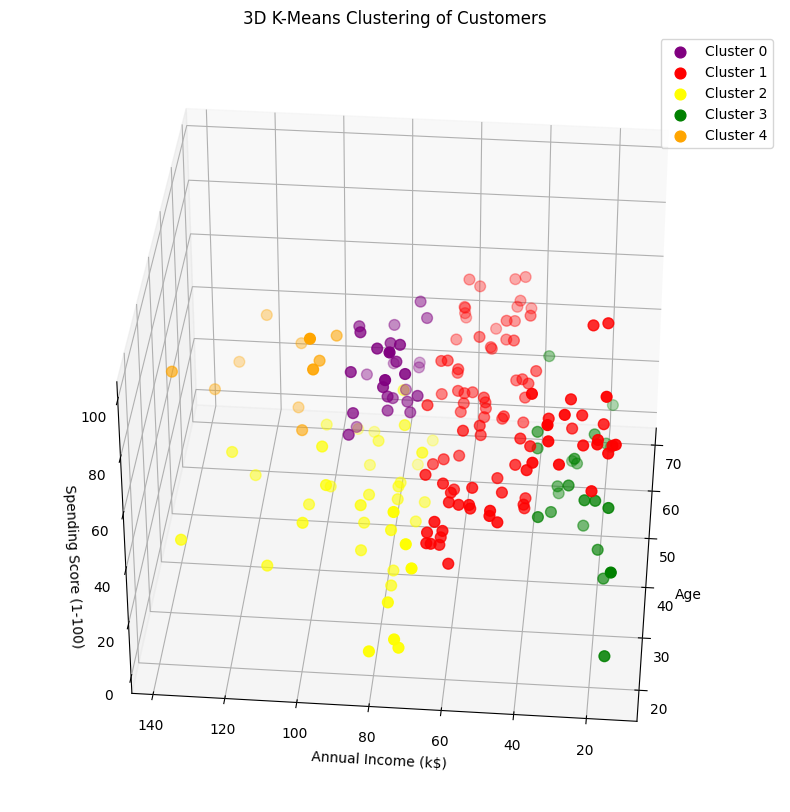

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ["purple", "red", "yellow", "green", "orange"]

for i, color in enumerate(colors):
    ax.scatter(
        df2.Age[df2.label == i],
        df2['Annual Income (k$)'][df2.label == i],
        df2['Spending Score (1-100)'][df2.label == i],
        c=color, s=60, label=f'Cluster {i}'
    )

ax.view_init(35, 185)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.title('3D K-Means Clustering of Customers')
ax.legend()
plt.show()
